In [1]:
# MLP FashionMNIST
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import random_split
from torch.utils.data import Dataset, DataLoader
train_dataset=datasets.FashionMNIST(root='FashionMNIST_data/', train=True, #학습 데이터
                                   transform=transforms.ToTensor(), # 0~255까지의 값을 0~1 사이의 값으로 변환시켜줌
                                   download=True)
test_dataset=datasets.FashionMNIST(root='FashionMNIST_data/', train=False, #학습 데이터
                                   transform=transforms.ToTensor(), # 0~255까지의 값을 0~1 사이의 값으로 변환시켜줌
                                   download=True)

c:\Users\ANNA_TEST\anaconda3\Lib\site-packages\torch\cuda\__init__.py:61: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]
100%|██████████| 26.4M/26.4M [00:23<00:00, 1.13MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 112kB/s]
100%|██████████| 4.42M/4.42M [00:06<00:00, 693kB/s]
100%|██████████| 5.15k/5.15k [00:00<?, ?B/s]


In [2]:
print(len(train_dataset))

train_dataset_size=int(len(train_dataset)*0.85)
validation_dataset_size=int(len(train_dataset)*0.15)

train_dataset, validation_dataset=random_split(train_dataset,[train_dataset_size, validation_dataset_size])

print(len(train_dataset), len(validation_dataset), len(test_dataset))

60000
51000 9000 10000


In [3]:
class MyDeepLearningModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.flatten=nn.Flatten()
        self.fc1=nn.Linear(784,256)
        self.reLU=nn.ReLU()
        self.dropout=nn.Dropout(0.3)
        self.fc2=nn.Linear(256,10)

    def forward(self,data):
        data=self.flatten(data)
        data=self.fc1(data)
        data=self.reLU(data)
        data=self.dropout(data)
        logits=self.fc2(data)
        return logits
    

In [4]:
BATCH_SIZE=32

train_dataset_loader=DataLoader(dataset=train_dataset,
                                batch_size=BATCH_SIZE,
                                shuffle=True)
validation_dataset_loader=DataLoader(dataset=validation_dataset,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True)
test_dataset_loader=DataLoader(dataset=test_dataset,
                               batch_size=BATCH_SIZE,
                               shuffle=True)

In [5]:
model=MyDeepLearningModel()
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=1e-2)

In [6]:
def model_train(dataloader, model, loss_function, optimizer):

    model.train()

    train_loss_sum=train_correct=train_total=0
    total_train_batch=len(dataloader)

    for images, labels in dataloader:
        x_train=images.view(-1,28*28)
        y_train=labels

        outputs=model(x_train)
        loss=loss_function(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss_sum+=loss.item()

        train_total+=y_train.size(0)
        train_correct+=((torch.argmax(outputs, 1)==y_train)).sum().item()

    train_avg_loss=train_loss_sum/total_train_batch
    train_avg_accuracy=100*train_correct/train_total

    return (train_avg_loss, train_avg_accuracy)

In [7]:
def model_evaluate(dataloader, model, loss_function, optimizer):

    model.eval()

    with torch.no_grad():

        val_loss_sum=val_correct=val_total=0

        total_val_batch=len(dataloader)

        for images, labels in dataloader:

            x_val=images.view(-1, 28*28)
            y_val=labels

            outputs=model(x_val)
            loss=loss_function(outputs, y_val)

            val_loss_sum+=loss.item()

            val_total+=y_val.size(0)
            val_correct+=((torch.argmax(outputs,1)==y_val)).sum().item()

        val_avg_loss=val_loss_sum/total_val_batch
        val_avg_accuracy=100*val_correct/val_total

    return (val_avg_loss, val_avg_accuracy)

In [8]:
def model_test(dataloader, model):

    model.eval()

    with torch.no_grad():

        test_loss_sum=test_correct=test_total=0

        total_test_batch=len(dataloader)

        for images, labels in dataloader:

            x_test=images.view(-1, 28*28)
            y_test=labels

            outputs=model(x_test)
            loss=loss_function(outputs, y_test)

            test_loss_sum+=loss.item()

            test_total+=y_test.size(0)
            test_correct+=((torch.argmax(outputs,1)==y_test)).sum().item()

        test_avg_loss=test_loss_sum/total_test_batch
        test_avg_accuracy=100*test_correct/test_total

    return (test_avg_loss, test_avg_accuracy)

In [9]:
train_loss_list=[]
train_accuracy_list=[]
val_loss_list=[]
val_accuracy_list=[]

EPOCH=20

for epoch in range(EPOCH):

    #===========model train=============
    train_avg_loss, train_avg_accuracy=model_train(train_dataset_loader,
                                                   model,loss_function,
                                                   optimizer)
    train_loss_list.append(train_avg_loss)
    train_accuracy_list.append(train_avg_accuracy)
    #-----------------------------------


    #===========model evaluation========
    val_avg_loss, val_avg_accuracy=model_evaluate(validation_dataset_loader,
                                                  model, loss_function,
                                                  optimizer)

    val_loss_list.append(val_avg_loss)
    val_accuracy_list.append(val_avg_accuracy)

    print(f'epoch:{epoch}, train loss={train_avg_loss}, train accuracy={train_avg_accuracy}, val loss={val_avg_loss}, val accuracy={val_avg_accuracy}')

epoch:0, train loss=0.9926517348329874, train accuracy=67.14313725490196, val loss=0.6670495415410251, val accuracy=77.2
epoch:1, train loss=0.6221048609076659, train accuracy=78.60980392156863, val loss=0.566839651752871, val accuracy=80.71111111111111
epoch:2, train loss=0.5461250007470398, train accuracy=81.23137254901961, val loss=0.5126968867918278, val accuracy=82.8
epoch:3, train loss=0.5051576277168661, train accuracy=82.46470588235294, val loss=0.48237949054926, val accuracy=83.6
epoch:4, train loss=0.4793270387344408, train accuracy=83.37058823529412, val loss=0.4630796212623728, val accuracy=84.24444444444444
epoch:5, train loss=0.45696321147560626, train accuracy=84.10588235294118, val loss=0.449258805536632, val accuracy=84.35555555555555
epoch:6, train loss=0.4425941283161398, train accuracy=84.51176470588236, val loss=0.4378958129925085, val accuracy=84.71111111111111
epoch:7, train loss=0.42697433734702944, train accuracy=85.02352941176471, val loss=0.4253443789186207, 

In [10]:
test_loss,test_accuracy=model_test(test_dataset_loader,model)
print(f'accuracy:{test_accuracy}')
print(f'loss:{test_loss}')

accuracy:86.75
loss:0.37376216996592077


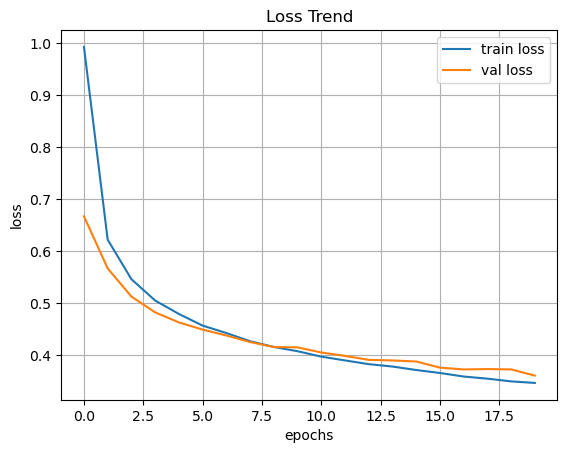

In [11]:
import matplotlib.pyplot as plt

plt.title("Loss Trend")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(train_loss_list, label="train loss")
plt.plot(val_loss_list, label="val loss")
plt.legend(loc='best')

plt.show()

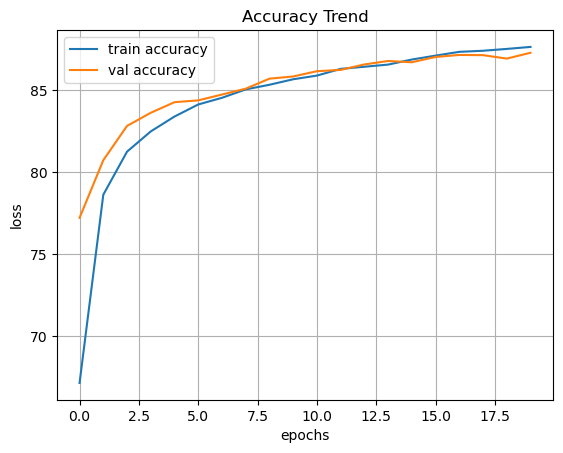

In [12]:
plt.title("Accuracy Trend")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(train_accuracy_list, label="train accuracy")
plt.plot(val_accuracy_list, label="val accuracy")
plt.legend(loc='best')

plt.show()

In [13]:
#CNN
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import random_split
from torch.utils.data import Dataset, DataLoader

device= torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

print(f'device:{device}')
                     

device:cuda


In [ ]:
train_dataset=datasets.FashionMNIST(root='FashionMNIST_data/', train=True, #학습 데이터
                                   transform=transforms.ToTensor(), # 0~255까지의 값을 0~1 사이의 값으로 변환시켜줌
                                   download=True)
test_dataset=datasets.FashionMNIST(root='FashionMNIST_data/', train=False, #학습 데이터
                                   transform=transforms.ToTensor(), # 0~255까지의 값을 0~1 사이의 값으로 변환시켜줌
                                   download=True)

train_dataset_size=int(len(train_dataset)*0.85)
validation_dataset_size=int(len(train_dataset)*0.15)

train_dataset, validation_dataset=random_split(train_dataset,[train_dataset_size,validation_dataset_size])

print(len(train_dataset), len(validation_dataset), len(test_dataset))

51000 9000 10000


In [15]:
class MyCNNModel(nn.Module):

    def __init__(self):
        super().__init__()

        self.conv1=nn.Conv2d(in_channels=1,
        out_channels=32, kernel_size=3, padding=1)

        self.conv2=nn.Conv2d(in_channels=32,
        out_channels=64,
        kernel_size=3, padding=1)

        self.pooling=nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1=nn.Linear(7*7*64,256)
        self.fc2=nn.Linear(256,10)

        self.dropout25=nn.Dropout(p=0.25)
        self.dropout50=nn.Dropout(p=0.5)

    def forward(self, data):

        data=self.conv1(data)
        data=torch.relu(data)
        data=self.pooling(data)
        data=self.dropout25(data)

        data=self.conv2(data)
        data=torch.relu(data)
        data=self.pooling(data)
        data=self.dropout25(data)

        data=data.view(-1,7*7*64)

        data=self.fc1(data)
        data=torch.relu(data)
        data=self.dropout50(data)

        logits=self.fc2(data)

        return logits
    

In [16]:
model=MyCNNModel().to(device)

loss_function=nn.CrossEntropyLoss()

optimizer=torch.optim.Adam(model.parameters(), lr=1e-3)

In [17]:
BATCH_SIZE=32

train_dataset_loader=DataLoader(dataset=train_dataset,
                                batch_size=BATCH_SIZE,
                                shuffle=True)
validation_dataset_loader=DataLoader(dataset=validation_dataset,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True)
test_dataset_loader=DataLoader(dataset=test_dataset,
                               batch_size=BATCH_SIZE,
                               shuffle=True)

In [18]:
def model_train(dataloader, model, loss_function, optimizer):

    model.train()

    train_loss_sum=train_correct=train_total=0

    total_train_batch=len(dataloader)

    for images, labels in dataloader:

        x_train=images.to(device)
        y_train=labels.to(device)

        outputs=model(x_train)
        loss=loss_function(outputs, y_train)
                                                                                                       
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss_sum+=loss.item()

        train_total+=y_train.size(0)
        train_correct+=((torch.argmax(outputs, 1)==y_train)).sum().item()

    train_avg_loss=train_loss_sum/total_train_batch
    train_avg_accuracy=100*train_correct/train_total

    return (train_avg_loss, train_avg_accuracy)

In [19]:
def model_evaluate(dataloader, model,loss_function, optimizer):

    model.eval()

    with torch.no_grad():

        val_loss_sum=val_correct=val_total=0

        total_val_batch=len(dataloader)

        for images, labes in dataloader:

            x_val=images.to(device)
            y_val=labes.to(device)

            outputs=model(x_val)
            loss=loss_function(outputs, y_val)

            val_loss_sum+=loss.item()

            val_total+=y_val.size(0)
            val_correct+=((torch.argmax(outputs,1)==y_val)).sum().item()

        val_avg_loss=val_loss_sum/total_val_batch
        val_avg_accuracy=100*val_correct/val_total

    return (val_avg_loss, val_avg_accuracy)

In [20]:
def model_test(dataloader, model):

    model.eval()

    with torch.no_grad():

        test_loss_sum=test_correct=test_total=0

        total_test_batch=len(dataloader)

        for images, labels in dataloader:

            x_test=images.to(device)
            y_test=labels.to(device)

            outputs=model(x_test)
            loss=loss_function(outputs, y_test)

            test_loss_sum+=loss.item()

            test_total+=y_test.size(0)
            test_correct+=((torch.argmax(outputs,1)==y_test)).sum().item()

        test_avg_loss=test_loss_sum/total_test_batch
        test_avg_accuracy=100*test_correct/test_total

    return (test_avg_loss, test_avg_accuracy)

In [21]:
train_loss_list=[]
train_accuracy_list=[]

val_loss_list=[]
val_accuracy_list=[]

EPOCH=20

for epoch in range(EPOCH):

    train_avg_loss,train_avg_accuracy=model_train(train_dataset_loader,model, loss_function, optimizer)

    train_loss_list.append(train_avg_loss)
    train_accuracy_list.append(train_avg_accuracy)

    val_avg_loss, val_avg_accuracy=model_evaluate(validation_dataset_loader,model, loss_function, optimizer)

    val_loss_list.append(val_avg_loss)
    val_accuracy_list.append(val_avg_accuracy)

    print(f'epoch:{epoch},train loss:{train_avg_loss}, train accuracy:{train_avg_accuracy}, val loss:{val_avg_loss}, val accuracy:{val_avg_accuracy}')

epoch:0,train loss:0.25455444485636797, train accuracy:92.10196078431373, val loss:0.06415177247171613, val accuracy:97.97777777777777
epoch:1,train loss:0.09642608463256608, train accuracy:97.11372549019607, val loss:0.048580537023392656, val accuracy:98.43333333333334
epoch:2,train loss:0.07760661565128292, train accuracy:97.62352941176471, val loss:0.04105451856253723, val accuracy:98.66666666666667
epoch:3,train loss:0.06403580739361805, train accuracy:98.0921568627451, val loss:0.03614254578613017, val accuracy:98.95555555555555
epoch:4,train loss:0.056218630967171244, train accuracy:98.26274509803922, val loss:0.03133080254808695, val accuracy:99.0
epoch:5,train loss:0.050005592652265694, train accuracy:98.51372549019608, val loss:0.02980791734823489, val accuracy:99.14444444444445
epoch:6,train loss:0.046653762859905225, train accuracy:98.52156862745097, val loss:0.029305943111531563, val accuracy:99.11111111111111
epoch:7,train loss:0.04194492190522037, train accuracy:98.666666

In [22]:
test_loss,test_accuracy=model_test(test_dataset_loader,model)

print(f'accuracy: {test_accuracy}')
print(f'loss: {test_loss}')

accuracy: 99.42
loss: 0.019533668251106123


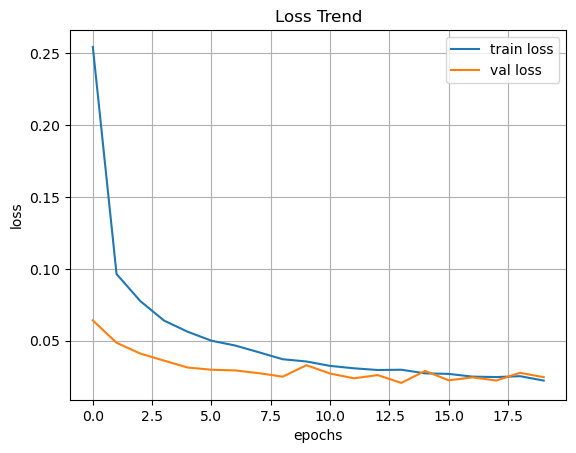

In [23]:
import matplotlib.pyplot as plt

plt.title("Loss Trend")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(train_loss_list, label="train loss")
plt.plot(val_loss_list, label="val loss")
plt.legend(loc='best')

plt.show()

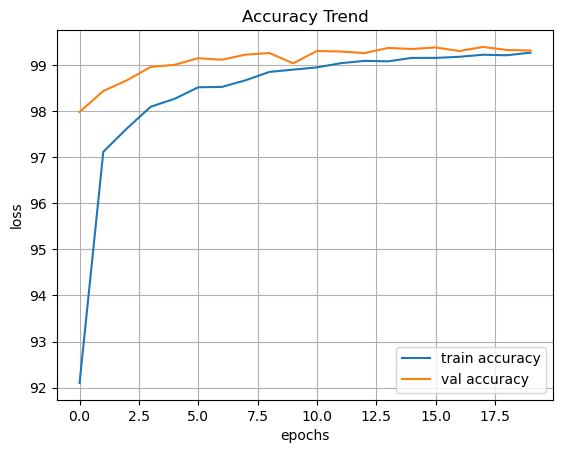

In [24]:
plt.title("Accuracy Trend")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(train_accuracy_list, label="train accuracy")
plt.plot(val_accuracy_list, label="val accuracy")
plt.legend(loc='best')

plt.show()